In [28]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Perceptron    # Used for simple linear classification tasks.

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential     # Sequential lets you build a neural network layer-by-layer in Keras.

from tensorflow.keras.layers import Dense     #Dense makes the final predictions
from tensorflow.keras.layers import Conv2D     # Conv2D extracts features
from tensorflow.keras.layers import Flatten    # Flatten reshapes them

from tensorflow.keras.layers import MaxPooling2D     # MaxPooling2D reduces size
from tensorflow.keras.layers import Dropout          # Dropout prevents overfitting

from tensorflow.keras.utils import to_categorical

import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [29]:
df = pd.read_csv('mnist_train_clean.csv')
df_test = pd.read_csv('mnist_test_clean.csv')

In [30]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape


(59999, 785)

In [32]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB


In [34]:
df_test.shape

(9999, 785)

In [35]:
df_test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train = df.drop("label", axis=1).values
y_train = df["label"].values
X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values

In [37]:

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [38]:

X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)


In [39]:

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [40]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])

In [41]:
perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:

history_percp = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7707 - accuracy: 0.8201 - val_loss: 0.4771 - val_accuracy: 0.8830
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4534 - accuracy: 0.8814 - val_loss: 0.3973 - val_accuracy: 0.8955
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4011 - accuracy: 0.8918 - val_loss: 0.3655 - val_accuracy: 0.9018
Epoch 4/5
1875/1875 [==============================] - 2s 812us/step - loss: 0.3750 - accuracy: 0.8969 - val_loss: 0.3468 - val_accuracy: 0.9075
Epoch 5/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.3586 - accuracy: 0.9011 - val_loss: 0.3338 - val_accuracy: 0.9089


In [43]:
acc_percp = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]


In [44]:
acc_percp

0.9088909029960632

## ANN

In [45]:

ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])


In [46]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:

history_ann = ann.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2334 - accuracy: 0.9308 - val_loss: 0.1166 - val_accuracy: 0.9641
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0988 - accuracy: 0.9696 - val_loss: 0.0946 - val_accuracy: 0.9713
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0677 - accuracy: 0.9781 - val_loss: 0.0897 - val_accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0740 - val_accuracy: 0.9781


In [48]:

acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]
acc_ann

0.9780977964401245

In [49]:

X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [51]:

cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])


In [52]:

cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [53]:

history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)


Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3707 - accuracy: 0.8875 - val_loss: 0.0606 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1336 - accuracy: 0.9647 - val_loss: 0.0451 - val_accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0976 - accuracy: 0.9749 - val_loss: 0.0330 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0828 - accuracy: 0.9789 - val_loss: 0.0506 - val_accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0726 - accuracy: 0.9815 - val_loss: 0.0399 - val_accuracy: 0.9885


In [55]:

acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
acc_cnn

0.988498866558075

In [58]:

def plot_training(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Val")
    plt.title(f"{title} Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Val")
    plt.title(f"{title} Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

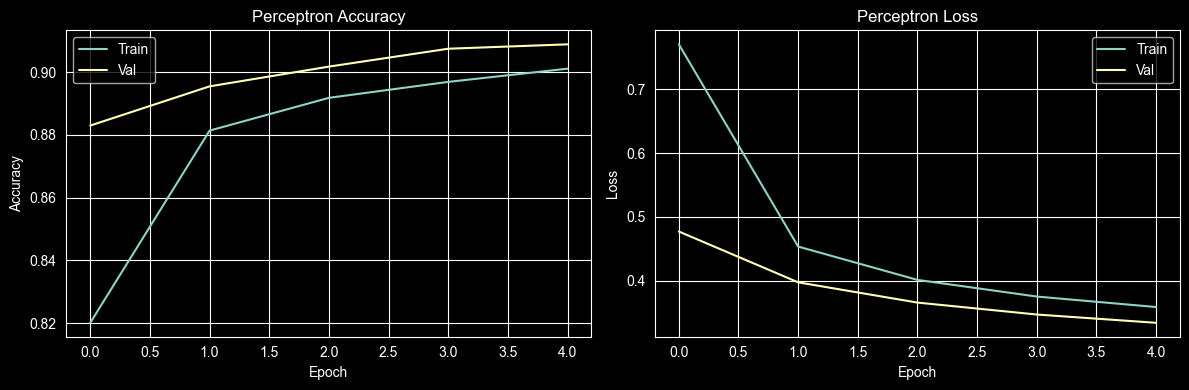

In [59]:

plot_training(history_percp, "Perceptron")

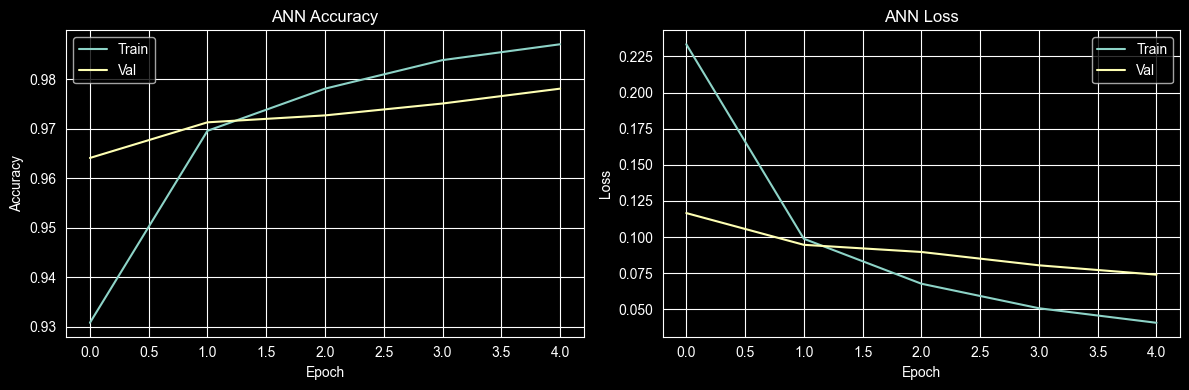

In [60]:

plot_training(history_ann, "ANN")

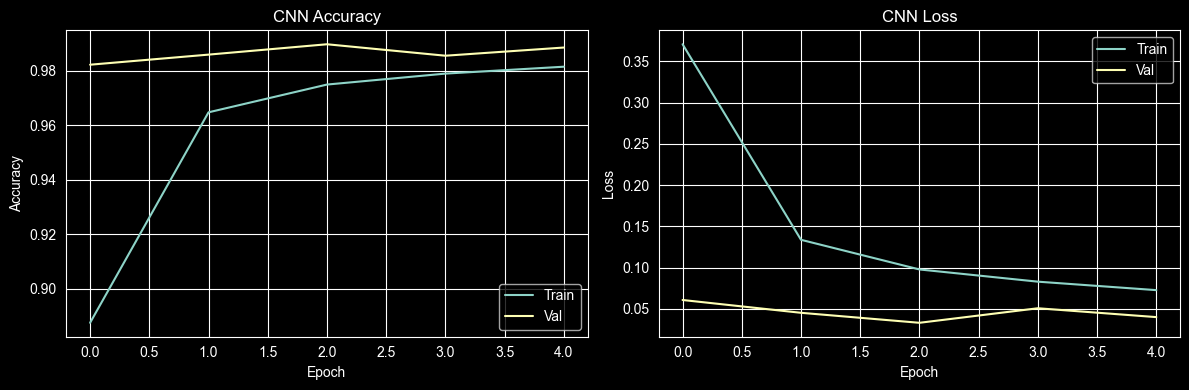

In [61]:
    plot_training(history_cnn, "CNN")

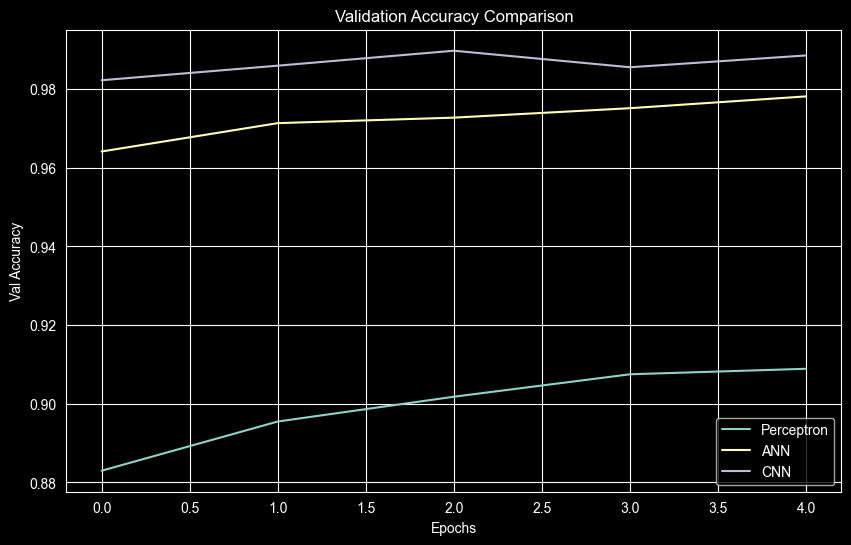

In [62]:
plt.figure(figsize=(10,6))
plt.plot(history_percp.history['val_accuracy'], label="Perceptron")
plt.plot(history_ann.history['val_accuracy'], label="ANN")
plt.plot(history_cnn.history['val_accuracy'], label="CNN")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

In [63]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 15ms/step


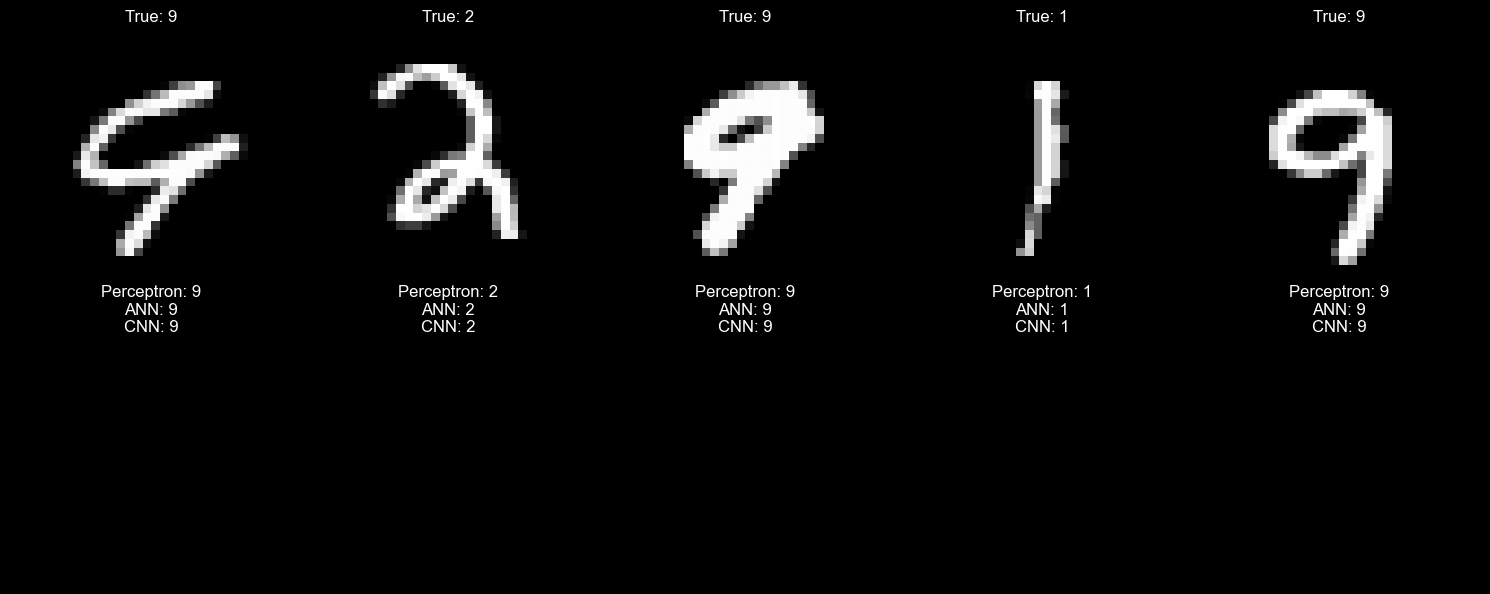

In [72]:

show_side_by_side([perceptron, ann, cnn], ["Perceptron", "ANN", "CNN"], X_test_img, X_test_cnn, y_test, 5)

313/313 [==============================] - 1s 2ms/step


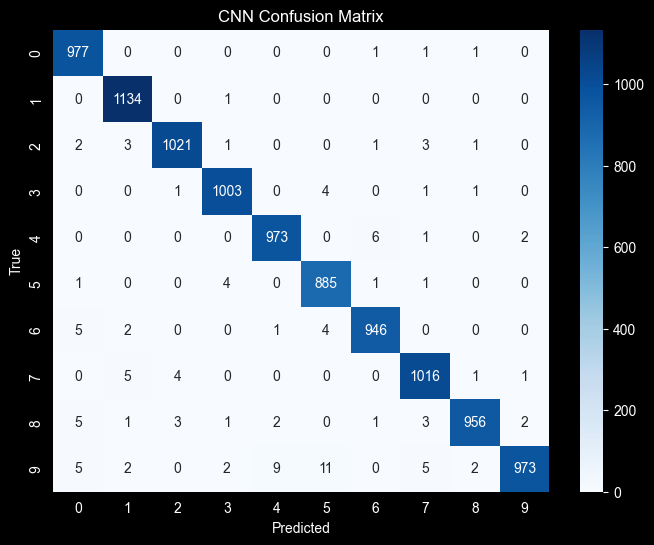

In [65]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


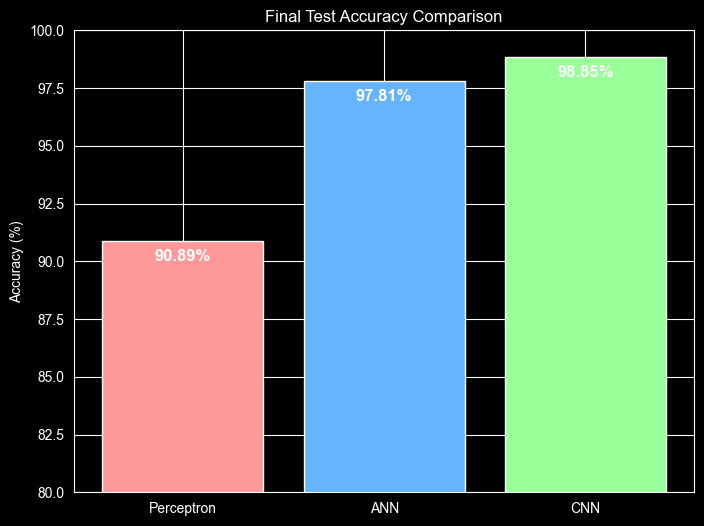

In [66]:

final_accs = [acc_percp*100, acc_ann*100, acc_cnn*100]
models = ["Perceptron", "ANN", "CNN"]

plt.figure(figsize=(8,6))
bars = plt.bar(models, final_accs, color=['#ff9999','#66b3ff','#99ff99'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy (%)")
for bar, acc in zip(bars, final_accs):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()-1, f"{acc:.2f}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(80, 100)
plt.show()
